In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install plotly_express

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv(r'/content/gdrive/MyDrive/Multivariate Analysis /Loan payments data.csv')

In [ ]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days', 'age', 'education', 'Gender']


In [ ]:
df.shape

(500, 11)

In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,-0.093139,-0.092613
terms,0.534302,1.000000,-0.102613,-0.074259
past_due_days,-0.093139,-0.102613,1.000000,-0.053849
age,-0.092613,-0.074259,-0.053849,1.000000


<ipython-input-11-effb445d3340>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Text(0.5, 1.0, 'Correlation between different fearures')

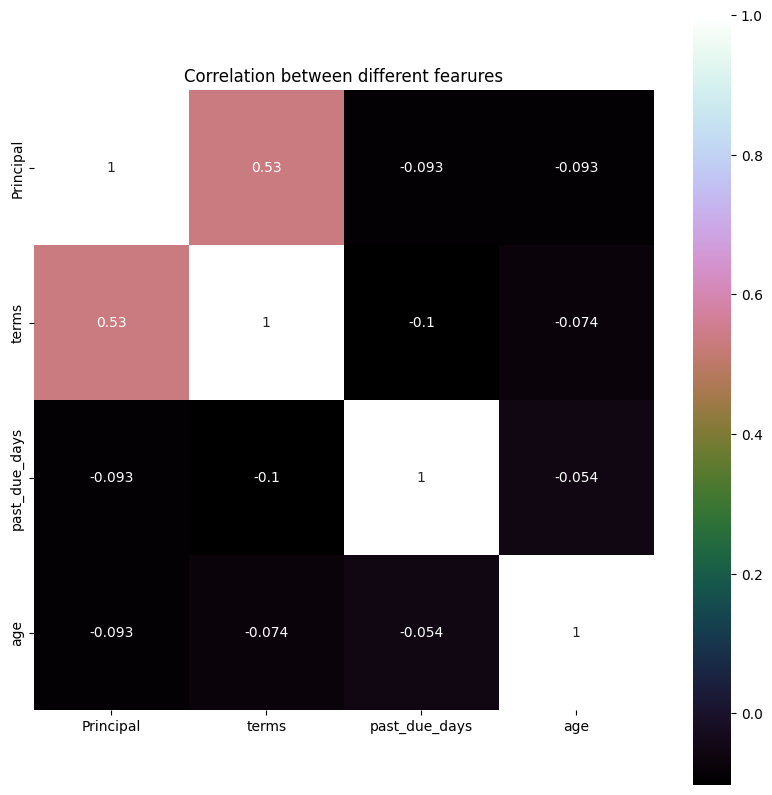

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

# Principal Component Analysis


In [ ]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [ ]:
df_drop = df.drop(labels=['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'paid_off_time', 'education', 'Gender'], axis=1)
df_drop.head()

,Principal,terms,past_due_days,age
0,1000,30,NaN,45
1,1000,30,NaN,50
2,1000,30,NaN,33
3,1000,15,NaN,27
4,1000,30,NaN,28


In [ ]:
cols = df_drop.columns.tolist()
cols

['Principal', 'terms', 'past_due_days', 'age']

In [ ]:
df_drop = df_drop.fillna(0)

In [ ]:
df_drop = df_drop.reindex(columns= cols)

In [ ]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[30.,  0., 45.],
       [30.,  0., 50.],
       [30.,  0., 33.],
       ...,
       [15.,  3., 30.],
       [30.,  1., 38.],
       [30.,  8., 28.]])

In [ ]:
y

array([1000, 1000, 1000, 1000, 1000,  300, 1000, 1000, 1000,  800,  300,
       1000, 1000,  900, 1000,  800, 1000, 1000, 1000,  800, 1000, 1000,
       1000, 1000, 1000, 1000,  800, 1000, 1000, 1000,  800, 1000, 1000,
       1000,  800,  800, 1000,  700, 1000, 1000, 1000,  800, 1000, 1000,
       1000,  800, 1000, 1000, 1000,  800,  800, 1000,  800, 1000, 1000,
       1000, 1000, 1000,  800,  800, 1000, 1000, 1000, 1000,  800,  900,
       1000, 1000,  300, 1000,  800,  800, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000,  800, 1000, 1000, 1000, 1000,
        800,  800,  800, 1000,  800,  800, 1000, 1000, 1000, 1000, 1000,
       1000, 1000,  800, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        800, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,  800, 1000,
       1000, 1000, 1000, 1000, 1000, 1000,  800, 1000, 1000, 1000,  800,
       1000, 1000,  800, 1000,  800, 1000, 1000, 1000, 1000,  800, 1000,
        800, 1000, 1000, 1000,  300, 1000,  800, 10

In [ ]:
np.shape(X)

(500, 3)

In [ ]:
np.shape(y)

(500,)

# Data Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Computing Eigenvectors and Eigenvalues

Covariance Matrix


In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00200401  0.03106903 -0.07440751]
 [ 0.03106903  1.00200401 -0.03808982]
 [-0.07440751 -0.03808982  1.00200401]]


In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00200401  0.03106903 -0.07440751]
 [ 0.03106903  1.00200401 -0.03808982]
 [-0.07440751 -0.03808982  1.00200401]]


Text(0.5, 1.0, 'Correlation between different features')

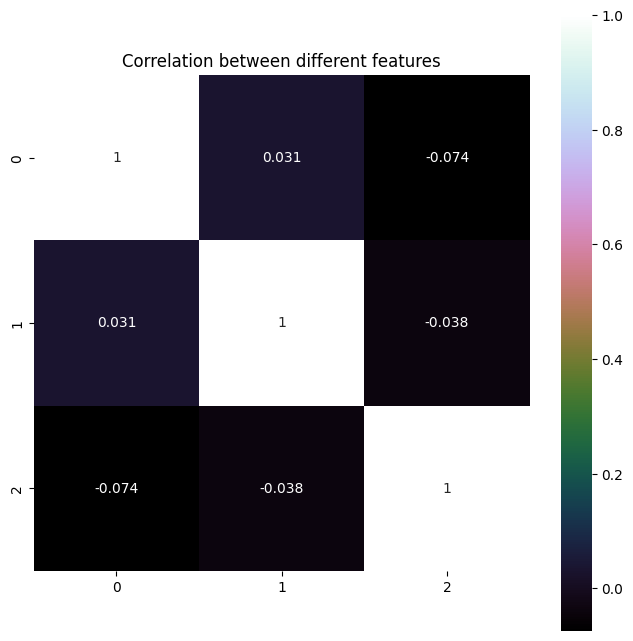

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.62432421 -0.68484641 -0.37577211]
 [-0.44452122 -0.08409585  0.89181207]
 [ 0.64235517 -0.72381854  0.25192569]]

Eigenvalues 
[1.10068173 0.92717737 0.97815293]


# Selecting Principal Components

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.1006817265999103
0.9781529308537633
0.9271773665944248


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

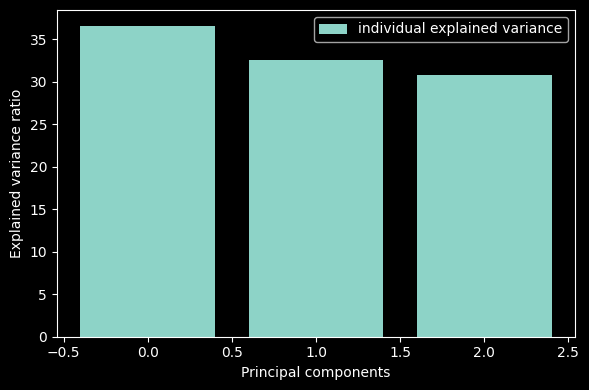

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), var_exp, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.62432421 -0.37577211]
 [-0.44452122  0.89181207]
 [ 0.64235517  0.25192569]]


In [ ]:
Y = X_std.dot(matrix_w)
Y

array([[ 1.15681460e+00, -2.63998987e-01],
       [ 1.68518054e+00, -5.67788099e-02],
       [-1.11263649e-01, -7.61327413e-01],
       [ 4.26468086e-01, -3.04718942e-01],
       [-6.39629586e-01, -9.68547590e-01],
       [ 1.89679804e+00,  4.02978773e-01],
       [-5.33956399e-01, -9.27103555e-01],
       [ 2.05755913e-01, -6.36995307e-01],
       [-6.39629586e-01, -9.68547590e-01],
       [ 3.20794898e-01, -3.46162977e-01],
       [ 1.26275892e+00,  1.54314561e-01],
       [ 1.69454633e+00,  1.92609484e-01],
       [-8.50975961e-01, -1.05143566e+00],
       [ 9.45739357e-01,  2.99824541e-02],
       [ 1.05141254e+00,  7.14264896e-02],
       [ 3.20794898e-01, -3.46162977e-01],
       [ 6.28448663e-01, -4.71219165e-01],
       [ 9.54834023e-01, -9.74987645e-02],
       [-2.16936836e-01, -8.02771448e-01],
       [-8.50975961e-01, -1.05143566e+00],
       [-8.50975961e-01, -1.05143566e+00],
       [ 9.45468225e-01, -3.46887058e-01],
       [-9.56649148e-01, -1.09287970e+00],
       [ 3.

<ipython-input-36-c924b983607a>:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,3,1)


Text(0, 0.5, 'Cumulative explained variance')

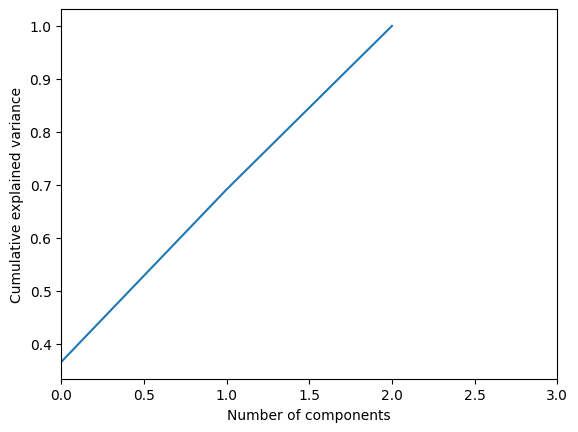

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,3,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [ ]:
print(Y_sklearn)

[[ 1.1568146  -0.26399899  2.22081188]
 [ 1.68518054 -0.05677881  2.81618509]
 [-0.11126365 -0.76132741  0.79191618]
 ...
 [ 0.69137228 -0.07583139 -0.84081114]
 [ 0.3997305  -0.51925542  1.39057584]
 [-0.7786039  -0.68973308  0.22283454]]


In [ ]:
Y_sklearn.shape

(500, 3)